In [1]:
import sys,time
sys.path.append('../../')
from smodels.experiment.defaultFinalStates import finalStates
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.decomposition.theorySMS import TheorySMS
from smodels.experiment.expSMS import ExpSMS
from smodels.base.model import Model
from smodels.base.physicsUnits import fb, GeV, TeV, pb
from smodels.experiment.txnameObj import TxName, TxNameData
from smodels.experiment.infoObj import Info
import numpy as np
import unum

In [2]:
filePath = '../database/8TeV/ATLAS/ATLAS-SUSY-2013-12/data/TChiChipmSlepL.txt'
globalInfo = Info('../database/8TeV/ATLAS/ATLAS-SUSY-2013-12/globalInfo.txt')
infoObj = Info('../database/8TeV/ATLAS/ATLAS-SUSY-2013-12/data/dataInfo.txt')
databaseParticles = finalStates
tx = TxName(filePath,globalInfo,infoObj,databaseParticles)

In [3]:
print(tx.constraint)
print(tx.condition)

2.*({(PV(0) > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L(4)), (anyBSM(3) > MET(5),L(6)), (anyBSM(2) > anyBSM(7),L(8)), (anyBSM(7) > MET(9),nu(10))}+{(PV(0) > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L(4)), (anyBSM(3) > MET(5),L(6)), (anyBSM(2) > anyBSM(7),nu(8)), (anyBSM(7) > MET(9),L(10))})
['Csim({(PV(0) > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L(4)), (anyBSM(3) > MET(5),L(6)), (anyBSM(2) > anyBSM(7),L(8)), (anyBSM(7) > MET(9),nu(10))},{(PV(0) > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L(4)), (anyBSM(3) > MET(5),L(6)), (anyBSM(2) > anyBSM(7),nu(8)), (anyBSM(7) > MET(9),L(10))})', 'Cgtr({(PV(0) > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L(4)), (anyBSM(3) > MET(5),L(6)), (anyBSM(2) > anyBSM(7),nu(8)), (anyBSM(7) > MET(9),L(10))},3.*{(PV(0) > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),ta(4)), (anyBSM(3) > MET(5),ta(6)), (anyBSM(2) > anyBSM(7),nu(8)), (anyBSM(7) > MET(9),L(10))})', 'Cgtr({(PV(0) > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L(4)), (anyBSM(3) > ME

In [4]:
print(tx._constraintFunc)
print(len(tx._conditionsList))
print(tx._conditionsList)

2.*(sms_1+sms_2)
9
[{'Csim(sms_1,sms_2)': {(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L), (anyBSM(2) > anyBSM(4),L), (anyBSM(3) > MET,L), (anyBSM(4) > MET,nu): 'sms_1', (PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L), (anyBSM(2) > anyBSM(4),nu), (anyBSM(3) > MET,L), (anyBSM(4) > MET,L): 'sms_2'}}, {'Cgtr(sms_1,3.*sms_2)': {(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L), (anyBSM(2) > anyBSM(4),nu), (anyBSM(3) > MET,L), (anyBSM(4) > MET,L): 'sms_1', (PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),ta), (anyBSM(2) > anyBSM(4),nu), (anyBSM(3) > MET,ta), (anyBSM(4) > MET,L): 'sms_2'}}, {'Cgtr(sms_1,3.*sms_2)': {(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L), (anyBSM(2) > anyBSM(4),L), (anyBSM(3) > MET,L), (anyBSM(4) > MET,nu): 'sms_1', (PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),ta), (anyBSM(2) > anyBSM(4),L), (anyBSM(3) > MET,ta), (anyBSM(4) > MET,nu): 'sms_2'}}, {'Cgtr(sms_1,3.*sms_2)': {(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L), (anyBSM(2)

In [5]:
slhafile = '../../inputFiles/slha/lightEWinos.slha'
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile)


In [6]:
expSMS = ExpSMS.from_string('(PV > C1+(1),N2(2)), (C1+(1) > nu,se_L(3)), (N2(2) > e+,sne_L(4)), (se_L(3) > e-,N1), (sne_L(4) > e-,N1)',
             model=model)
# Hack to create a theory element from a string:
treeA = TheorySMS()
treeA.add_nodes_from(expSMS.nodes)
treeA.add_edges_from(expSMS.edgeIndices)
treeA.prodXSec = 1.0*fb
treeA.maxWeight = 1.0*fb
treeA.setGlobalProperties()

expSMS = ExpSMS.from_string('(PV > C1+(1),N2(2)), (C1+(1) > e+,sne_L(3)), (N2(2) > e+,sne_L(4)), (sne_L(3) > nue,N1), (sne_L(4) > e-,N1)',
             model=model)
# Hack to create a theory element from a string:
treeB = TheorySMS()
treeB.add_nodes_from(expSMS.nodes)
treeB.add_edges_from(expSMS.edgeIndices)
treeB.prodXSec = 1.0*fb
treeB.maxWeight = 1.0*fb
treeB.setGlobalProperties()

sms_1


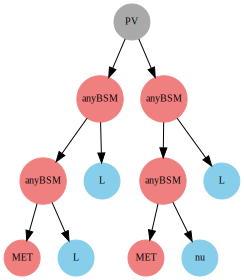

sms_2


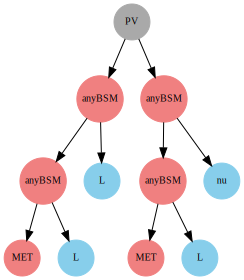

In [7]:
for k,v in tx.smsMap.items():
    print(v)
    k.draw()
    

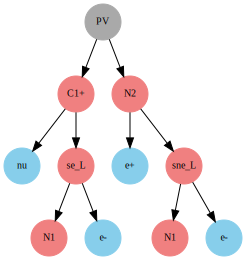

[(0, PV), (1, C1+), (2, N2), (3, nu), (4, se_L), (5, e+), (6, sne_L), (7, N1), (8, e-), (9, N1), (10, e-)]


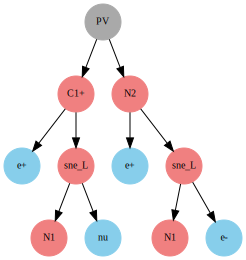

[(0, PV), (1, C1+), (2, N2), (3, e+), (4, sne_L), (5, e+), (6, sne_L), (7, N1), (8, nu), (9, N1), (10, e-)]


In [8]:
treeA.draw()
print(list(zip(treeA.nodeIndices,treeA.nodes)))
treeB.draw()
print(list(zip(treeB.nodeIndices,treeB.nodes)))


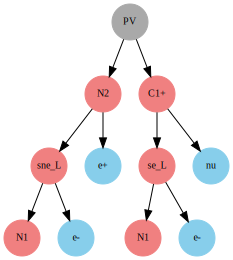

sms_2
[(0, PV), (1, N2), (2, C1+), (3, sne_L), (4, e+), (5, N1), (6, e-), (7, se_L), (8, nu), (9, N1), (10, e-)]


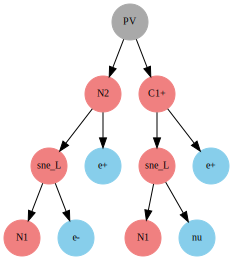

sms_1
[(0, PV), (1, N2), (2, C1+), (3, sne_L), (4, e+), (5, N1), (6, e-), (7, sne_L), (8, e+), (9, N1), (10, nu)]


In [9]:
elMatchA = tx.hasSMSas(treeA)
elMatchB = tx.hasSMSas(treeB)
elMatchA.weight = 100*fb
elMatchB.weight = 5*pb
elMatchA.draw()
print(elMatchA.txlabel)
print(list(zip(elMatchA.nodeIndices,elMatchA.nodes)))
elMatchB.draw()
print(elMatchB.txlabel)
print(list(zip(elMatchB.nodeIndices,elMatchB.nodes)))

In [10]:
els = [elMatchA,elMatchB]

In [11]:
print(tx.evalConstraintFor(els))
print(tx.evalConstraintFor(els) == 2*(elMatchA.weight+elMatchB.weight))

1.02E+01 [pb]
True


In [12]:
print(tx.evalConditionsFor(els))

[0.9607843137254902, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5]
